# Autoencoders for Image compression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models,layers


## Data Preparation

In [ ]:
#load the MNIST dataset
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
print(xtrain.shape)
print(xtest.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:

xtrain = xtrain.reshape(60000,28*28)
xtest = xtest.reshape(10000,28*28)

## Modelling

In [ ]:
# Encoder
input_layer = layers.Input(shape=(784,))
dense1 = layers.Dense(128,activation='relu')(input_layer)

dense2 = layers.Dense(64,activation='relu')(dense1)

# Decoder 
dense3 = layers.Dense(128,activation='relu')(dense2)
output_layer = layers.Dense(784,activation='sigmoid')(dense3)
model = models.Model(input_layer,output_layer)
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,xtrain,epochs=30,batch_size=128,shuffle=True,validation_data=(xtest,xtest))

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1774 - accuracy: 0.0109 - val_loss: 0.1144 - val_accuracy: 0.0102
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1054 - accuracy: 0.0110 - val_loss: 0.0967 - val_accuracy: 0.0109
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0940 - accuracy: 0.0125 - val_loss: 0.0895 - val_accuracy: 0.0138
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0890 - accuracy: 0.0137 - val_loss: 0.0861 - val_accuracy: 0.0136
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.0132 - val_loss: 0.0840 - val_accuracy: 0.0127
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0839 - accuracy: 0.0126 - val_loss: 0.0819 - val_accuracy: 0.0130
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0821 - accuracy: 0.0128 - val_loss: 0.0804 - val_accuracy: 0.0146
Epoch 

In [ ]:
encoder = models.Model(input_layer,dense2)
encoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encodop = encoder.predict(xtest)
print(encodop.shape)
prediction = model.predict(xtest)
print(prediction.shape)

(10000, 64)
(10000, 784)


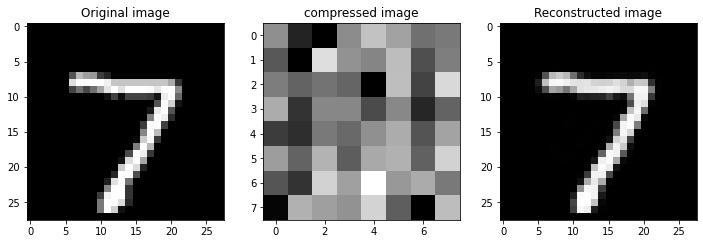

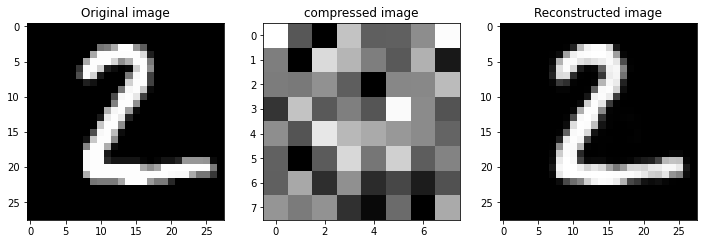

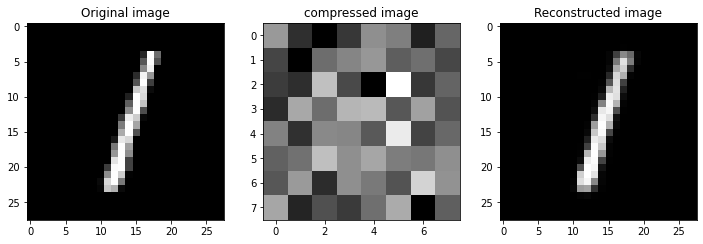

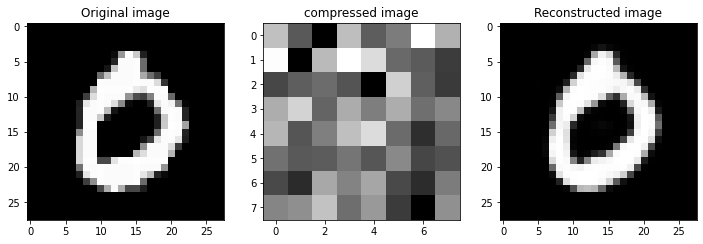

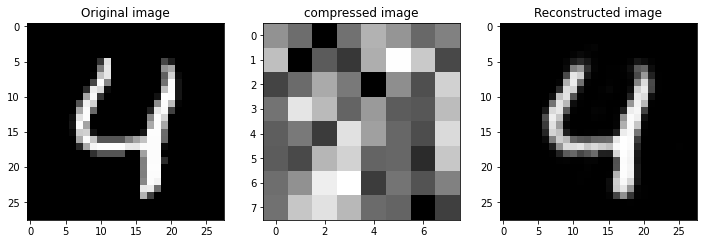

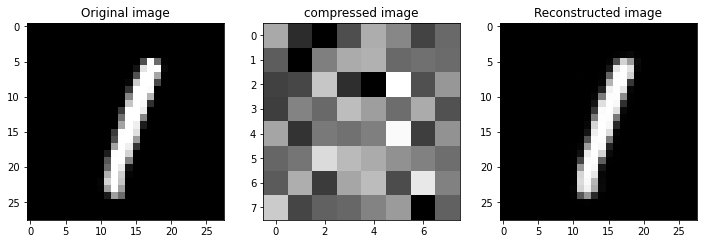

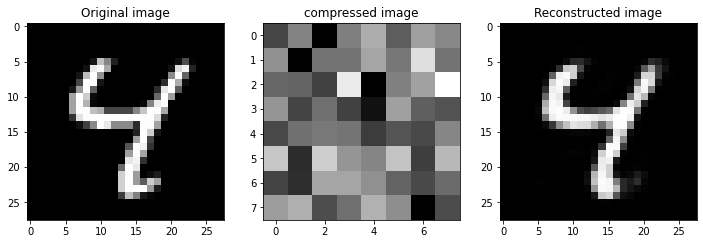

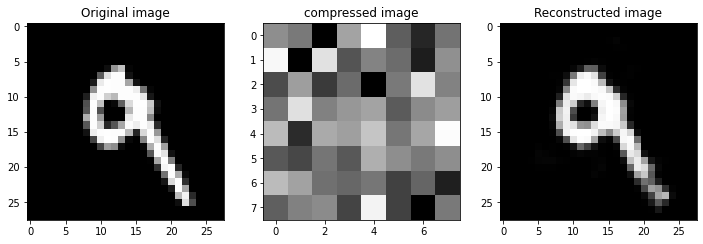

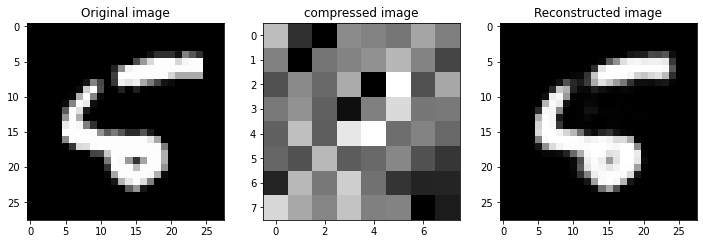

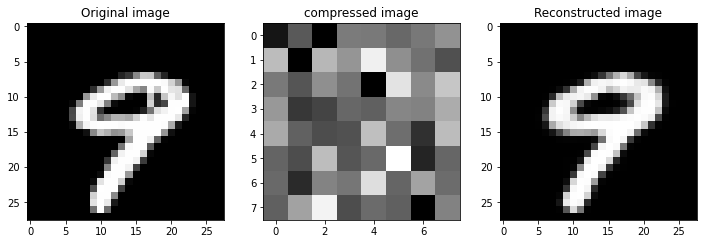

In [ ]:
n = 10
for i in range(n):
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  plt.title("Original image")
  plt.imshow(xtest[i].reshape(28,28),cmap='gray')
  plt.subplot(132)
  plt.title("compressed image")
  plt.imshow(encodop[i].reshape(8,8),cmap='gray')
  plt.subplot(133)
  plt.title("Reconstructed image")
  plt.imshow(prediction[i].reshape(28,28),cmap='gray')
  plt.show()
  


## Autoencoders for denoising images

In [ ]:
#load the MNIST dataset
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
xtrain = (xtrain - 127.5) / 127.5
xtest = (xtest - 127.5) / 127.5
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
input_layer = layers.Input(shape=(28,28,1))
c1 = layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=(2,2))(input_layer)
c2 = layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=(2,2))(c1)

c3 = layers.Conv2DTranspose(8,(3,3),activation='relu',padding='same',strides=(2,2))(c2)
c4 = layers.Conv2DTranspose(16,(3,3),activation='relu',padding='same',strides=(2,2))(c3)
output_layer = layers.Conv2D(1,(3,3),activation='tanh',padding='same')(c4)

model = models.Model(input_layer,output_layer)
model.summary()

Model: "functional_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_16 (Conv2DT (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_17 (Conv2DT (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
___________________________________________________

In [ ]:
from tensorflow.keras import losses
model.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [ ]:
import tensorflow as tf
noise_factor = 0.4
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape=xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape=xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy,-1.0,1.0) 
xtest_noisy = tf.clip_by_value(xtest_noisy,-1.0,1.0)

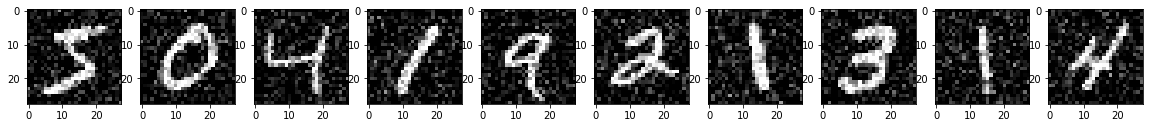

In [ ]:
n=10
plt.figure(figsize=(20,3))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(tf.squeeze(xtrain_noisy[i]),cmap='gray')
plt.show()

In [ ]:
model.fit(xtrain_noisy,xtrain,epochs=20,batch_size=1000,shuffle=True,validation_data=(xtest_noisy,xtest))

Epoch 1/20
60/60 [==============================] - 1s 21ms/step - loss: 0.5232 - val_loss: 0.2838
Epoch 2/20
60/60 [==============================] - 1s 18ms/step - loss: 0.2088 - val_loss: 0.1647
Epoch 3/20
60/60 [==============================] - 1s 19ms/step - loss: 0.1439 - val_loss: 0.1245
Epoch 4/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0830 - val_loss: 0.0485
Epoch 5/20
60/60 [==============================] - 1s 18ms/step - loss: 0.0378 - val_loss: 0.0301
Epoch 6/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0278 - val_loss: 0.0248
Epoch 7/20
60/60 [==============================] - 1s 18ms/step - loss: 0.0240 - val_loss: 0.0223
Epoch 8/20
60/60 [==============================] - 1s 18ms/step - loss: 0.0220 - val_loss: 0.0207
Epoch 9/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0206 - val_loss: 0.0195
Epoch 10/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0195 - val_loss: 0.0186
Epoch 11/

In [ ]:
prediction = model.predict(xtest_noisy)
prediction.shape

(10000, 28, 28, 1)

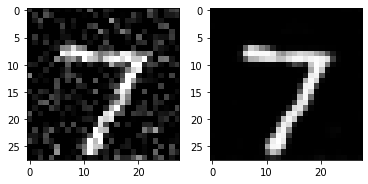

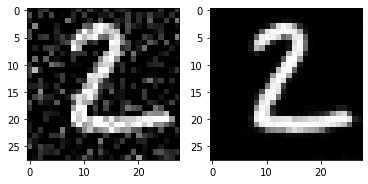

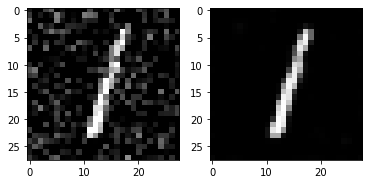

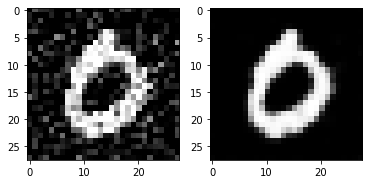

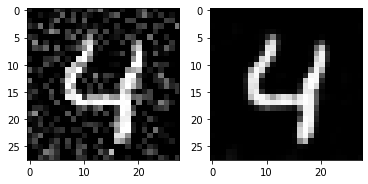

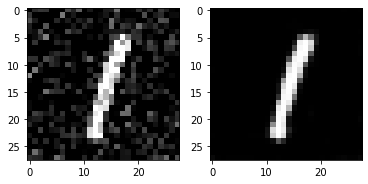

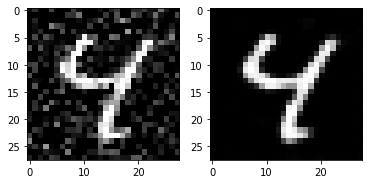

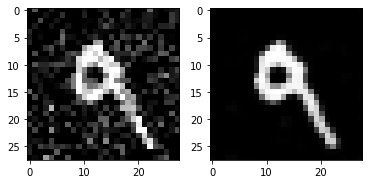

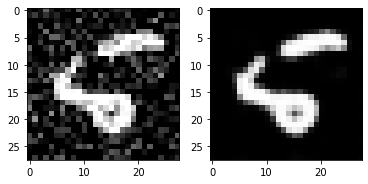

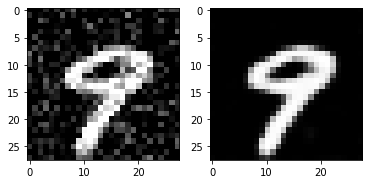

In [ ]:
n = 10
for i in range(10):
  plt.subplot(121)
  plt.imshow(tf.squeeze(xtest_noisy[i]),cmap='gray')
  plt.subplot(122)
  plt.imshow(prediction[i].reshape(28,28),cmap='gray')
  plt.show()